# NaLBaNA Demo

This Jupyter notebook contains a demonstration of some of the basic functions of the Natural Language to Bayesian Network Agent, with special attention to how it handles some classic cases in the literature on causal inference. We specifically look at a simple "causal fork" structure.

## Install the Package

In [1]:
!pip install git+https://github.com/davidbkinney/NaLBaNA.git

  Cloning https://github.com/davidbkinney/NaLBaNA.git to /tmp/pip-req-build-tauec2vm
  Running command git clone --filter=blob:none --quiet https://github.com/davidbkinney/NaLBaNA.git /tmp/pip-req-build-tauec2vm
  Resolved https://github.com/davidbkinney/NaLBaNA.git to commit a1073c2ef4394b739dea287594ab73486999682a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for NaLBaNA: filename=nalbana-0.1.1-py3-none-any.whl size=16764 sha256=4e6c2a30dcbe660031295c7fa828ae8807dc023787eaeb25b8dc99c2466bd160
  Stored in directory: /tmp/pip-ephem-wheel-cache-sp50f1uh/wheels/62/e1/ea/cb2d09e65fb5e1b0631548ddf6b610efa3102537ac04eb6ba5
Successfully built NaLBaNA


In [2]:
from NaLBaNA import bayes_net

## Connect to the OpenAI API

In [ ]:
bayes_net.input_key("Your API Key")

## Three-Variable Fork Case

Here we examine the simple case of a "causal fork", or a three-variable system
in which one variable is a common cause of the other two.

First, we enter our prompt.

In [4]:
prompt = """
Smoking causes lung cancer and yellow teeth.
"""

Next, we use that prompt to generate a Bayesian network.

In [5]:
bn = bayes_net.generate_bayes_net(prompt)

Extracting variables.
Variables extracted.
Generating variable values.
Variable values generated.
Defining causal graph.
Causal graph defined.
Generating conditional probability tables.
1 of 3 conditional probability tables generated (one per variable).
2 of 3 conditional probability tables generated (one per variable).
3 of 3 conditional probability tables generated (one per variable).
Conditional probability tables generated.
Bayesian network generated!


Visualize the Bayesian network

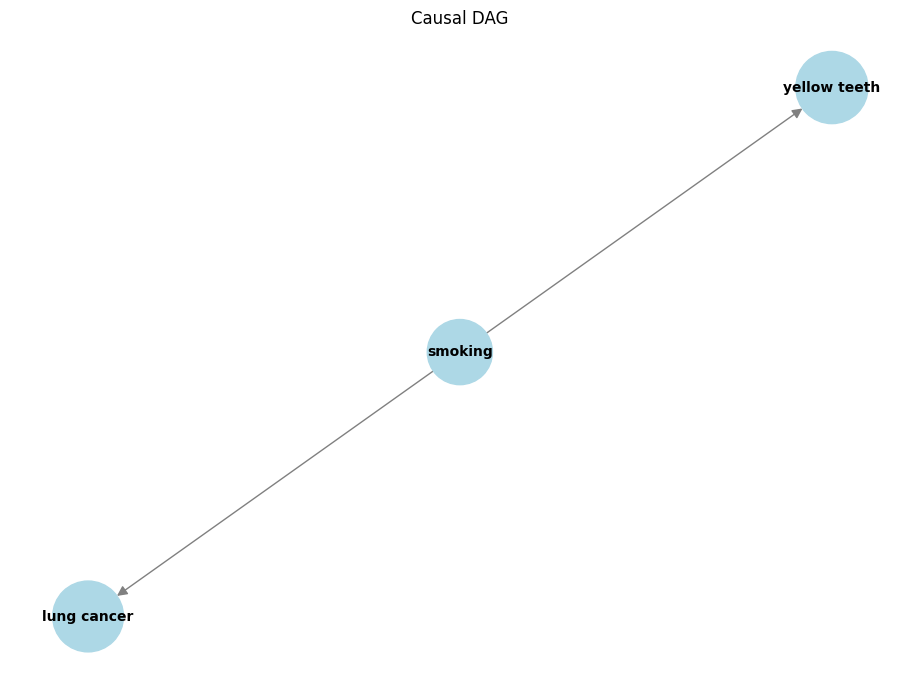

In [6]:
bayes_net.visualize(bn)

Get the joint distribution over the Bayesian network.

In [7]:
bayes_net.get_joint_distribution(bn)

,smoking,lung cancer,yellow teeth,joint_probability
0,smoker,present,yellow,0.181812
1,smoker,present,not yellow,0.044834
2,smoker,absent,yellow,0.066885
3,smoker,absent,not yellow,0.016494
4,non-smoker,present,yellow,0.027000
5,non-smoker,present,not yellow,0.109489
6,non-smoker,absent,yellow,0.109489
7,non-smoker,absent,not yellow,0.443998


Get the conditional probability table showing a person's probability of having lung cancer, depending on whether or not they have yellow teeth. **IMPT: The names of your variables and values may differ from those shown here, depending on what the LLM actually outputs. When making the function calls below, you must change variable names and values to reflect your actual output from the previous LLM call.**

In [8]:
bayes_net.get_conditional_probability_table(bn,'lung cancer',
                                       ['yellow teeth'])

,,yellow teeth=yellow,yellow teeth=not yellow
0,present,0.542107,0.251007
1,absent,0.457893,0.748993


Get the marginal probability distribution over whether a person has lung cancer.

In [9]:
bayes_net.get_marginal_distribution(bn,'lung cancer')

,lung cancer,marginal_probability
0,present,0.363135
1,absent,0.636865


Get the probability distribution over whether a person has lung cancer, given an intervention making their teeth yellow.

In [10]:
bayes_net.get_marginal_distribution(bn,'lung cancer',
                                    intervention=[{'variable':'yellow teeth',
                                                  'value':'yellow'}])

,lung cancer,marginal_probability
0,present,0.363135
1,absent,0.636865


We can also show the conditional probability table, given the same intervention.

In [11]:
bayes_net.get_conditional_probability_table(bn,'lung cancer',
                                       ['yellow teeth'],
                                      intervention=[{'variable':'yellow teeth',
                                                  'value':'yellow'}])

,,yellow teeth=yellow,yellow teeth=not yellow
0,present,0.363135,0.0
1,absent,0.636865,0.0


Now let's show the marginal probability distribution over whether someone has yellow teeth, given an intervention such that they are a smoker.

In [12]:
bayes_net.get_marginal_distribution(bn,'lung cancer',
                                    intervention=[{'variable':'smoking',
                                                  'value':'smoker'}])

,lung cancer,marginal_probability
0,present,0.731059
1,absent,0.268941


Next, lets look at the conditional probability table for lung cancer, given smoking.

In [13]:
bayes_net.get_conditional_probability_table(bn,'lung cancer',
                                       ['smoking'])

,,smoking=smoker,smoking=non-smoker
0,present,0.731059,0.197816
1,absent,0.268941,0.802184


Finally, lets change the probability that someone gets lung cancer, given that
they are a smoker, to something more realistic.

In [18]:
updated_bn = bayes_net.change_conditional_probabilities(bn,'lung cancer',
                      parent_values=[{"variable":"smoking","value":"smoker"}],
                new_probabilities=[{"value":"present","new_probability":.1},
                                   {"value":"absent","new_probability":.9}])

Let's do the same for the conditional probability that someone gets lung cancer given that they are not a smoker.

In [20]:
updated_bn = bayes_net.change_conditional_probabilities(bn,'lung cancer',
                parent_values=[{"variable":"smoking","value":"non-smoker"}],
                new_probabilities=[{"value":"present","new_probability":.01},
                                   {"value":"absent","new_probability":.99}])

Finally, let's confirm our change and examine its effects:

In [23]:
bayes_net.get_conditional_probability_table(bn,'lung cancer',
                                       ['smoking'])

,,smoking=smoker,smoking=non-smoker
0,present,0.1,0.01
1,absent,0.9,0.99


In [21]:
bayes_net.get_joint_distribution(updated_bn)

,smoking,lung cancer,yellow teeth,joint_probability
0,smoker,present,yellow,0.024870
1,smoker,present,not yellow,0.006133
2,smoker,absent,yellow,0.223828
3,smoker,absent,not yellow,0.055195
4,non-smoker,present,yellow,0.001365
5,non-smoker,present,not yellow,0.005535
6,non-smoker,absent,yellow,0.135123
7,non-smoker,absent,not yellow,0.547952


In [22]:
bayes_net.get_conditional_probability_table(bn,'lung cancer',
                                       ['yellow teeth'])

,,yellow teeth=yellow,yellow teeth=not yellow
0,present,0.068109,0.018978
1,absent,0.931891,0.981022
